# E3 Fundamentals of Visualization libraries Part 1 ß Matplotlib

In [85]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib.dates as mdates

In [19]:
import matplotlib
matplotlib.__version__

'3.10.3'

In [21]:
df = pd.read_csv('citibike_weather_2022.csv', index_col=0, nrows=500)
print(df.head())

                  rideable_type started_at ended_at       start_station_name  \
ride_id                                                                        
BFD29218AB271154  electric_bike    13:43.4  22:31.5  West End Ave & W 107 St   
7C953F2FD7BE1302   classic_bike    30:54.2  41:43.4             4 Ave & 3 St   
95893ABD40CED4B8  electric_bike    52:43.1  06:35.2          1 Ave & E 62 St   
F853B50772137378   classic_bike    35:48.2  10:50.5          2 Ave & E 96 St   
7590ADF834797B4B   classic_bike    14:23.0  34:57.5          6 Ave & W 34 St   

                  start_station_id             end_station_name  \
ride_id                                                           
BFD29218AB271154           7650.05  Mt Morris Park W & W 120 St   
7C953F2FD7BE1302           4028.04      Boerum Pl\t& Pacific St   
95893ABD40CED4B8           6753.08              5 Ave & E 29 St   
F853B50772137378           7338.02              5 Ave & E 29 St   
7590ADF834797B4B           6364.10   

In [23]:
chunks = pd.read_csv('citibike_weather_2022.csv', index_col=0, chunksize=50000, low_memory=False)

df_full = pd.concat(chunks)

In [35]:
df.columns

Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avg_temp'],
      dtype='object')

In [41]:
df.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avg_temp
ride_id,,,,,,,,,,,,,,
BFD29218AB271154,electric_bike,13:43.4,22:31.5,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,2022-01-21,-6.0
7C953F2FD7BE1302,classic_bike,30:54.2,41:43.4,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,2022-01-10,1.6
95893ABD40CED4B8,electric_bike,52:43.1,06:35.2,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,2022-01-26,-2.3
F853B50772137378,classic_bike,35:48.2,10:50.5,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,2022-01-03,1.4
7590ADF834797B4B,classic_bike,14:23.0,34:57.5,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,2022-01-22,-5.9


In [44]:
df.shape

(500, 14)

In [47]:
df.dtypes

rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avg_temp                     float64
dtype: object

In [50]:
df_temp = df.set_index('date')

In [53]:
df_temp.head()

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avg_temp
date,,,,,,,,,,,,,
2022-01-21,electric_bike,13:43.4,22:31.5,West End Ave & W 107 St,7650.05,Mt Morris Park W & W 120 St,7685.14,40.802117,-73.968181,40.804038,-73.945925,member,-6.0
2022-01-10,classic_bike,30:54.2,41:43.4,4 Ave & 3 St,4028.04,Boerum Pl\t& Pacific St,4488.09,40.673746,-73.985649,40.688489,-73.991160,member,1.6
2022-01-26,electric_bike,52:43.1,06:35.2,1 Ave & E 62 St,6753.08,5 Ave & E 29 St,6248.06,40.761227,-73.960940,40.745168,-73.986831,member,-2.3
2022-01-03,classic_bike,35:48.2,10:50.5,2 Ave & E 96 St,7338.02,5 Ave & E 29 St,6248.06,40.783964,-73.947167,40.745168,-73.986831,member,1.4
2022-01-22,classic_bike,14:23.0,34:57.5,6 Ave & W 34 St,6364.10,5 Ave & E 29 St,6248.06,40.749640,-73.988050,40.745168,-73.986831,member,-5.9


In [69]:
df['date'] = pd.to_datetime(df['date'])

## Line Plot

In [101]:
df['date'] = pd.to_datetime(df['date'])
df['date'].value_counts().head()

date
2022-01-19    38
2022-01-10    29
2022-01-02    28
2022-01-26    26
2022-01-13    24
Name: count, dtype: int64

In [103]:
# Aggregate by date to get average temperature per day
daily_temp = df.groupby('date')['avg_temp'].mean().reset_index()

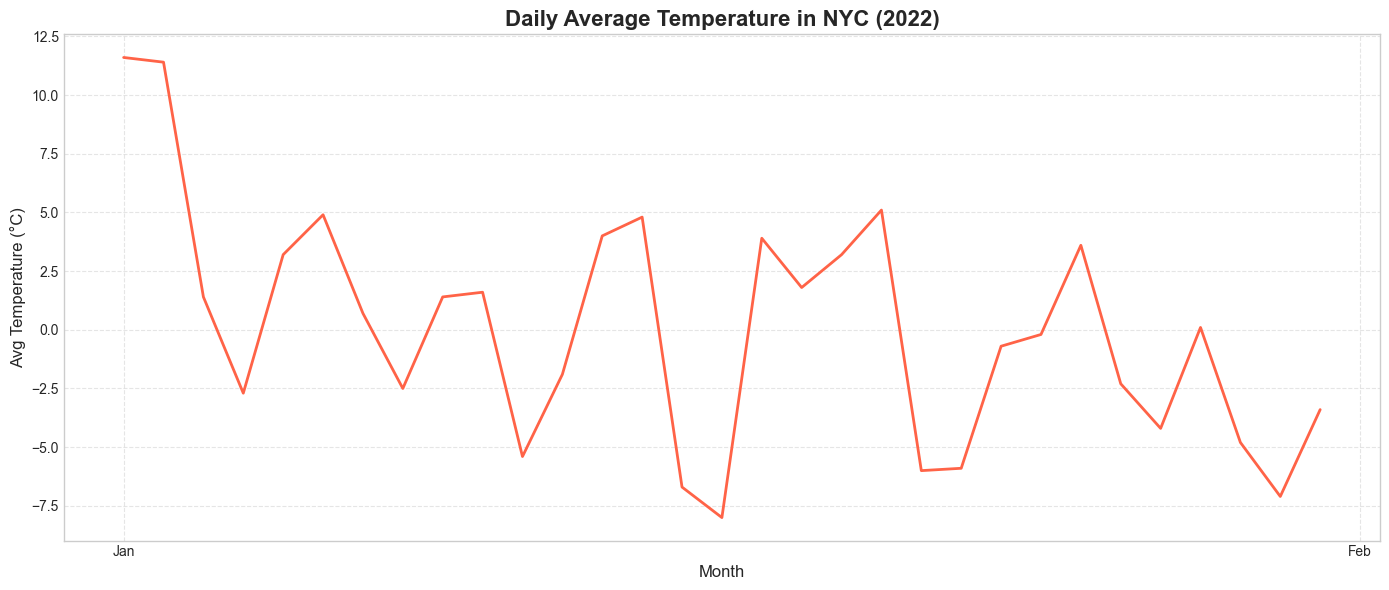

In [105]:
# Sort by date (just in case)
daily_temp = daily_temp.sort_values('date')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(daily_temp['date'], daily_temp['avg_temp'], color='tomato', linewidth=2)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Labels and title
plt.title('Daily Average Temperature in NYC (2022)', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Avg Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()


### Trips count

In [109]:
df['date'] = pd.to_datetime(df['date'])  # make sure 'date' is in datetime format

# Group by date to get number of trips per day
daily_trips = df.groupby('date').size().reset_index(name='trip_count')

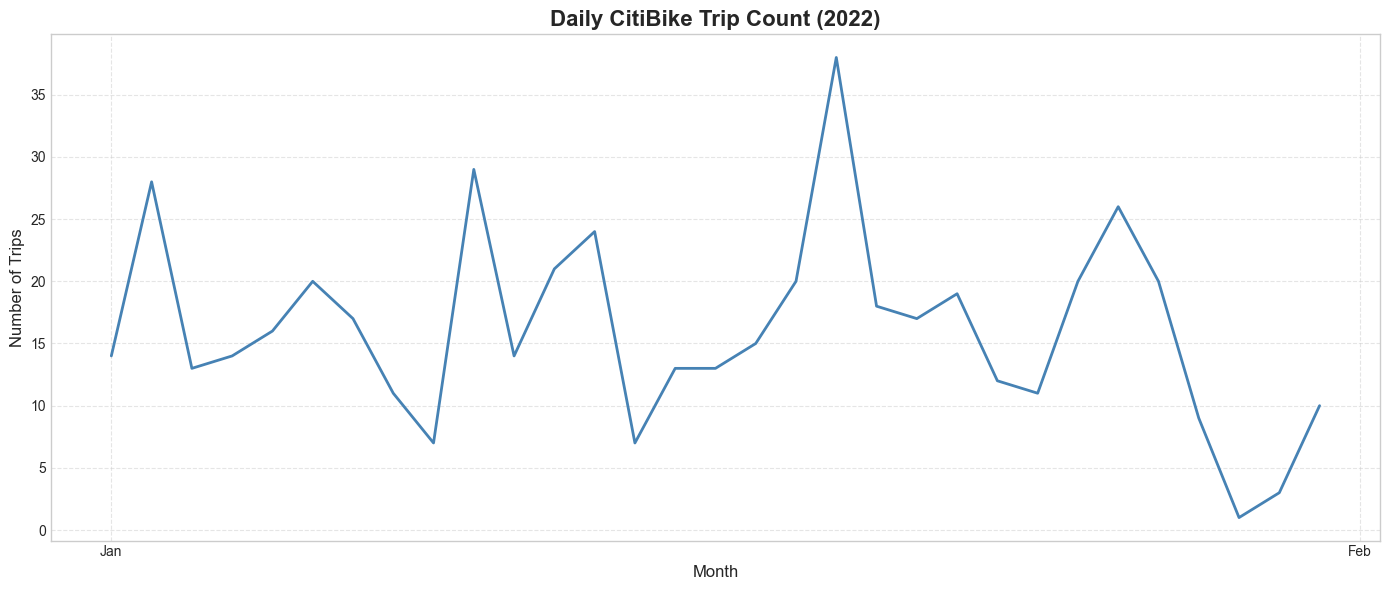

In [111]:
# Sort for a clean line
daily_trips = daily_trips.sort_values('date')

plt.figure(figsize=(14, 6))
plt.plot(daily_trips['date'], daily_trips['trip_count'], color='steelblue', linewidth=2)

# Format x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Add labels and title
plt.title('Daily CitiBike Trip Count (2022)', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()

### bike trip counts and temperatures 

In [123]:
merged['trip_date'] = pd.to_datetime(merged['trip_date'])
merged = merged.sort_values('trip_date')


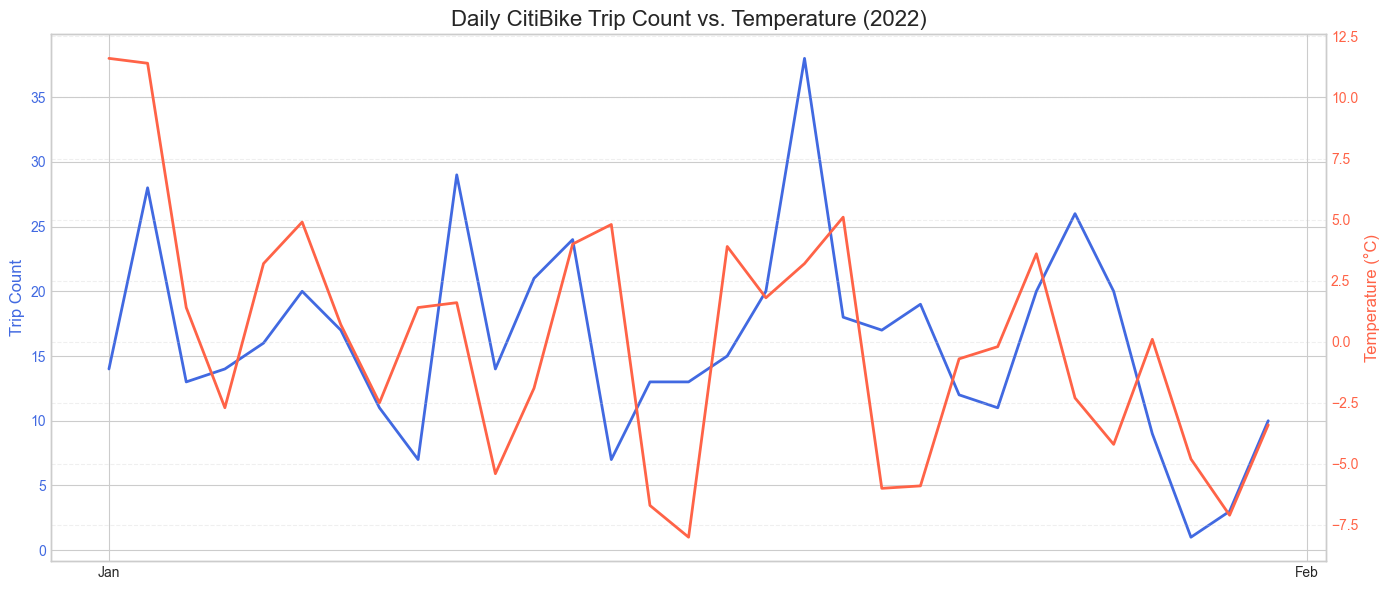

In [125]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left axis: Trip Count
ax1.plot(merged['trip_date'], merged['trip_count'], color='royalblue', label='Trip Count', linewidth=2)
ax1.set_ylabel('Trip Count', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')

# Format x-axis to show months
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Right axis: Temperature
ax2 = ax1.twinx()
ax2.plot(merged['trip_date'], merged['avg_temp'], color='tomato', label='Temperature (°C)', linewidth=2)
ax2.set_ylabel('Temperature (°C)', color='tomato')
ax2.tick_params(axis='y', labelcolor='tomato')

# Titles and layout
plt.title('Daily CitiBike Trip Count vs. Temperature (2022)', fontsize=16)
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()


In [139]:
# First, convert 'date' to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Then group by date to count trips per day
daily_counts = df.groupby('date').size().reset_index(name='trip_count')

In [141]:
# Merge the trip count with average temperature on 'date'
merged = pd.merge(daily_counts, df[['date', 'avg_temp']].drop_duplicates(), on='date')

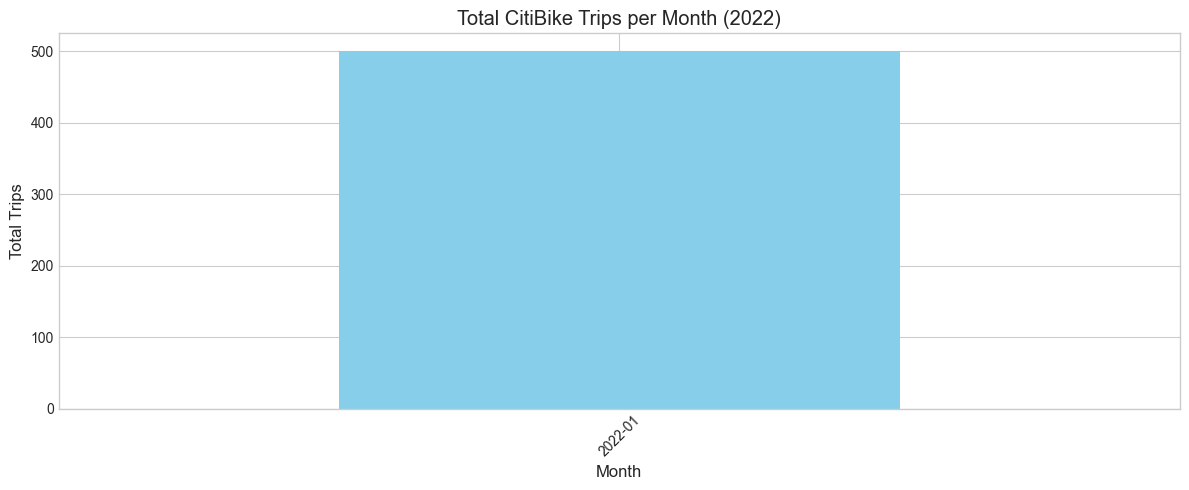

In [145]:
# Ensure 'merged' has the correct 'date' and 'trip_count'
merged['month'] = merged['date'].dt.to_period('M')

# Group and sum trip counts by month
monthly_counts = merged.groupby('month')['trip_count'].sum()

# Plot
monthly_counts.plot(kind='bar', figsize=(12, 5), color='skyblue', title='Total CitiBike Trips per Month (2022)')
plt.ylabel('Total Trips')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### The visualizations clearly demonstrate that CitiBike usage is seasonal, peaking during warmer months. By combining NYC weather data with CitiBike trip records, we can identify how daily temperature trends influence user behavior and provide valuable insights for transportation planning and bike-share operations.

# Bonus Task

In [182]:
df['tripduration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60  # in minutes

In [186]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Axes: >

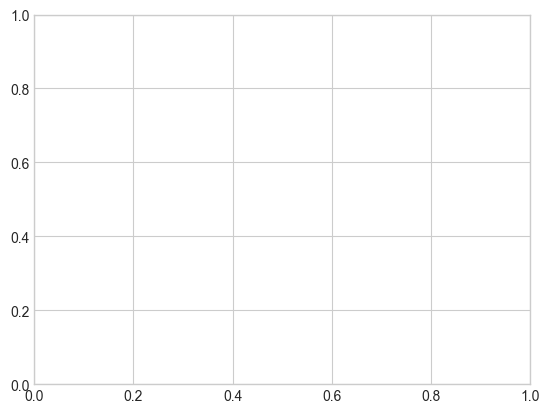

In [192]:
# Histogram with Kernel Density Estimation (KDE)
sns.histplot(df['tripduration'], bins=50, kde=True, color='skyblue')

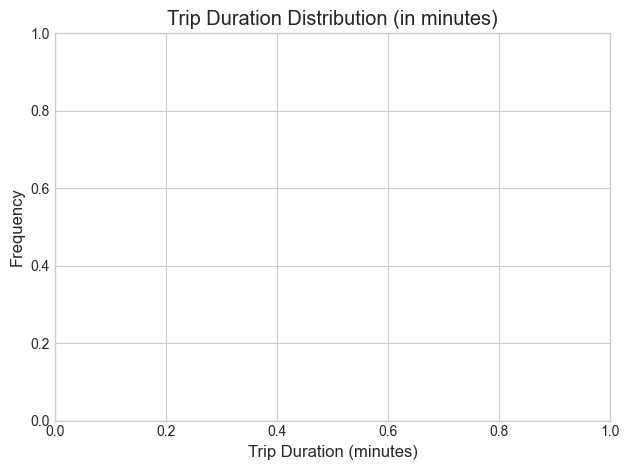

In [190]:
plt.title('Trip Duration Distribution (in minutes)')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

### Two Axes Figure

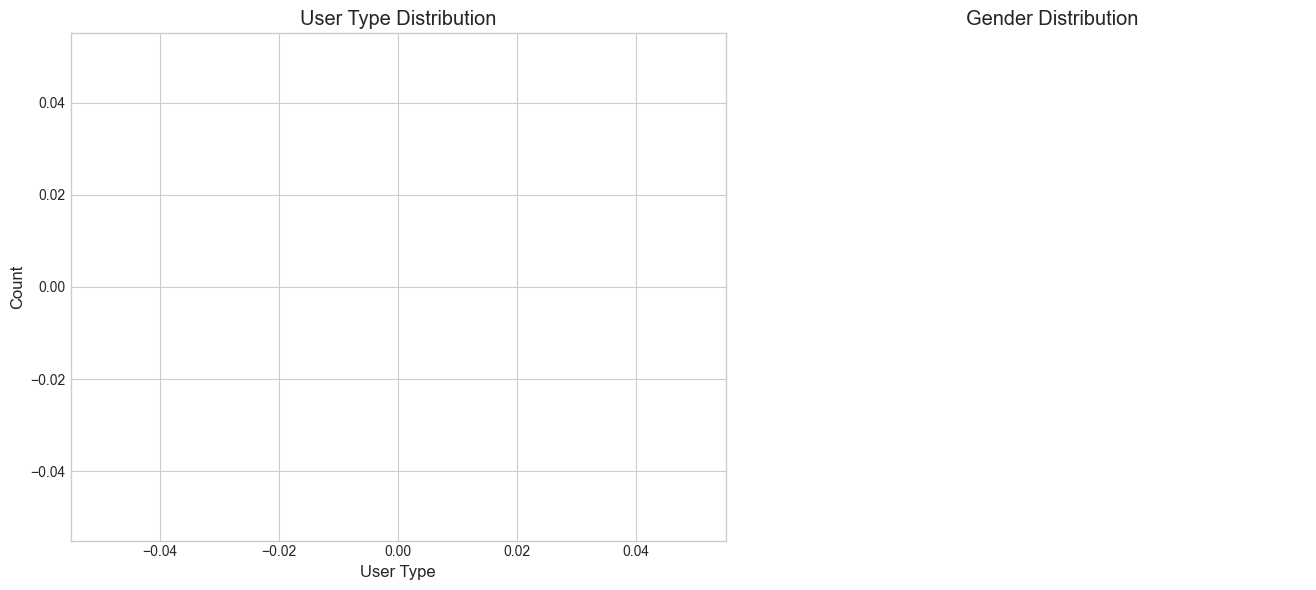

In [221]:
# Prepare the counts
user_counts = df['member_casual'].value_counts()
# Use fallback if 'gender' is not in your dataset
if 'gender' in df.columns:
    gender_counts = df['gender'].value_counts()
else:
    gender_counts = df['rideable_type'].value_counts()

# Create the figure and two axes in one go
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart
ax1.bar(user_counts.index, user_counts.values, color='skyblue')
ax1.set_title('User Type Distribution')
ax1.set_xlabel('User Type')
ax1.set_ylabel('Count')

# Pie chart
ax2.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
ax2.set_title('Gender Distribution')  # or Rideable Type if fallback

# Show plot
plt.tight_layout()
plt.show()